<a href="https://colab.research.google.com/github/MuhammadRhakan/final-project/blob/main/Course_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub
!pip install squarify
!pip install kagglehub[pandas-datasets]

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sq
import time

from kagglehub import KaggleDatasetAdapter
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
course = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "hossaingh/udemy-courses",  #dataset handle
    "Course_info.csv" #dataset name
)
time.sleep(10) #delay 10 second to ensure all data is stored
course.shape

<ipython-input-4-068efce8630b>:1: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  course = kagglehub.load_dataset(


(209734, 20)

In [ ]:
course.head()

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40,41.0,13.0,14.0,82.0,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.80,395.0,88.0,36.0,1511.0,2011-06-20T20:08:38Z,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,569.0,2011-06-23T18:31:20Z,NaN,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/


In [ ]:
course_filter_lang = course[course['language'].isin({'English', 'Indonesian'})]
course_filter_lang.shape

(125501, 20)

In [ ]:
course_filter_lang.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125501 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  125501 non-null  float64
 1   title               125501 non-null  object 
 2   is_paid             125501 non-null  bool   
 3   price               125501 non-null  float64
 4   headline            125481 non-null  object 
 5   num_subscribers     125501 non-null  float64
 6   avg_rating          125501 non-null  float64
 7   num_reviews         125501 non-null  float64
 8   num_comments        125501 non-null  float64
 9   num_lectures        125501 non-null  float64
 10  content_length_min  125501 non-null  float64
 11  published_time      125501 non-null  object 
 12  last_update_date    125374 non-null  object 
 13  category            125501 non-null  object 
 14  subcategory         125501 non-null  object 
 15  topic               124938 non-null  ob

In [ ]:
#check unique values for each column
print(course_filter_lang.nunique().reset_index().set_axis(['Features', 'Unique Values'], axis=1).to_markdown(tablefmt='outline'))

+----+--------------------+-----------------+
|    | Features           |   Unique Values |
+====+====================+=================+
|  0 | id                 |          125501 |
|  1 | title              |          124497 |
|  2 | is_paid            |               2 |
|  3 | price              |             161 |
|  4 | headline           |          121424 |
|  5 | num_subscribers    |           18370 |
|  6 | avg_rating         |            5573 |
|  7 | num_reviews        |            4321 |
|  8 | num_comments       |            1734 |
|  9 | num_lectures       |             643 |
| 10 | content_length_min |            2763 |
| 11 | published_time     |          125433 |
| 12 | last_update_date   |            3511 |
| 13 | category           |              13 |
| 14 | subcategory        |             130 |
| 15 | topic              |            3743 |
| 16 | language           |               2 |
| 17 | course_url         |          125501 |
| 18 | instructor_name    |       

In [ ]:
#check duplicates
def duplicate_check(data):
  print("\n📌 Checking for Duplicate Values")
  print("-" * 45)

  duplicated_rows = data.duplicated().sum()
  if data.duplicated().any():
    print("\n⚠️ Duplicate values found! Cleaning up...")
    print("🔄 Removing duplicates...")
    data = data.drop_duplicates()
    print(f"✅ Done! {duplicated_rows} duplicates have been removed.\n")
  else:
    print("\n✅ No duplicate values found. Data is clean!\n")

  print("-" * 45)

  return data

course_no_duplicate = duplicate_check(course_filter_lang)


📌 Checking for Duplicate Values
---------------------------------------------

✅ No duplicate values found. Data is clean!

---------------------------------------------


In [ ]:
#check missing values
def missing_values_check(data):
  print("\n📌 Checking for Missing Values")
  print("🔄 Showing missing values...\n")

  percentage = (data.isnull().sum() / data.shape[0]) * 100
  missing_values = pd.DataFrame({
      'Features': data.columns,
      'Missing Values': data.isnull().sum(),
      'Percentage': [f'{round(value,2)}%' for value in percentage]
      })
  missing_values.reset_index(drop=True, inplace=True)

  print(missing_values.to_markdown(tablefmt='pipe', index=False))

missing_values_check(course_no_duplicate)


📌 Checking for Missing Values
🔄 Showing missing values...

| Features           |   Missing Values | Percentage   |
|:-------------------|-----------------:|:-------------|
| id                 |                0 | 0.0%         |
| title              |                0 | 0.0%         |
| is_paid            |                0 | 0.0%         |
| price              |                0 | 0.0%         |
| headline           |               20 | 0.02%        |
| num_subscribers    |                0 | 0.0%         |
| avg_rating         |                0 | 0.0%         |
| num_reviews        |                0 | 0.0%         |
| num_comments       |                0 | 0.0%         |
| num_lectures       |                0 | 0.0%         |
| content_length_min |                0 | 0.0%         |
| published_time     |                0 | 0.0%         |
| last_update_date   |              127 | 0.1%         |
| category           |                0 | 0.0%         |
| subcategory        |      

In [ ]:
#keep it blank for later

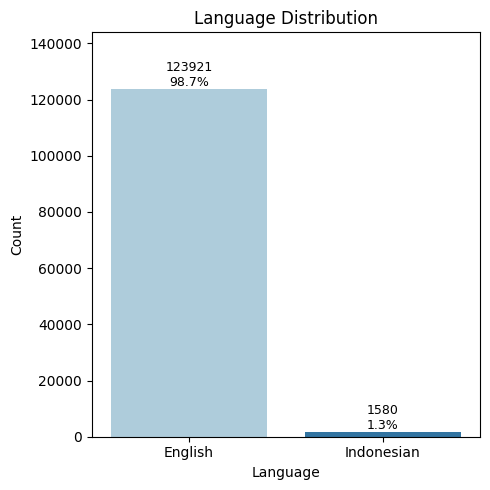

In [ ]:
#check language distribution
def language_distribution(data, lang):
  plt.figure(figsize=(5,5))
  graph = sns.countplot(x=lang, data=data, width=0.8, palette='Paired', hue=lang, legend=False)

  for bar in graph.patches:
      count = int(bar.get_height())
      percentage = (count / len(data)) * 100
      label = f"{count}\n{percentage:.1f}%"
      graph.annotate(label,
                      (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                      ha='center', va='bottom', fontsize=9)

  plt.title('Language Distribution')
  plt.xlabel('Language')
  plt.ylabel('Count')
  plt.ylim(0, max(data[lang].value_counts()) + 20000)

  plt.tight_layout()
  plt.show()

language_distribution(course_no_duplicate, 'language')

In [ ]:
 #define categorical and numerical attributes
 def attributes(data):
  categorical = []
  print(f"Categorical Attributes:")
  for i, cat in enumerate(data.select_dtypes(include = ['object', 'bool']).columns.values):
    categorical.append(cat)
    print(f"{i+1}. {cat}")

  numerical = []
  print(f"\nNumerical Attributes:")
  for i, num in enumerate(data.select_dtypes(include = 'number').drop(columns='id').columns.values):
    numerical.append(num)
    print(f"{i+1}. {num}")

  return categorical, numerical

categorical, numerical = attributes(course_no_duplicate)

Categorical Attributes:
1. title
2. is_paid
3. headline
4. published_time
5. last_update_date
6. category
7. subcategory
8. topic
9. language
10. course_url
11. instructor_name
12. instructor_url

Numerical Attributes:
1. price
2. num_subscribers
3. avg_rating
4. num_reviews
5. num_comments
6. num_lectures
7. content_length_min


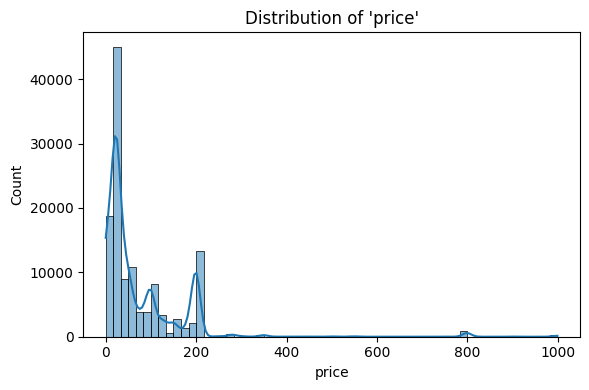

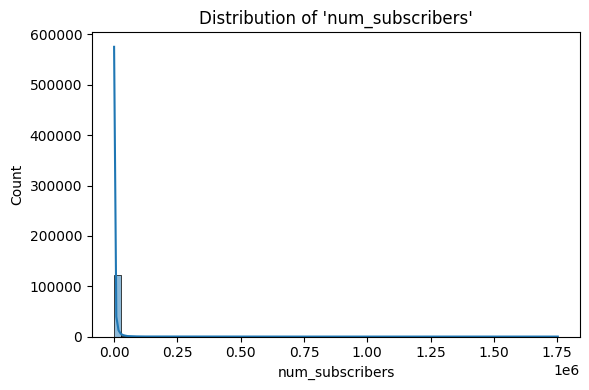

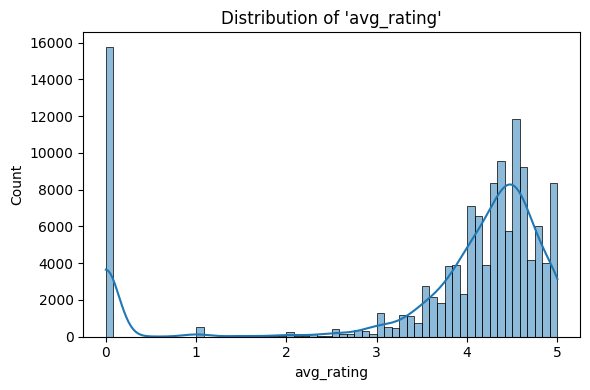

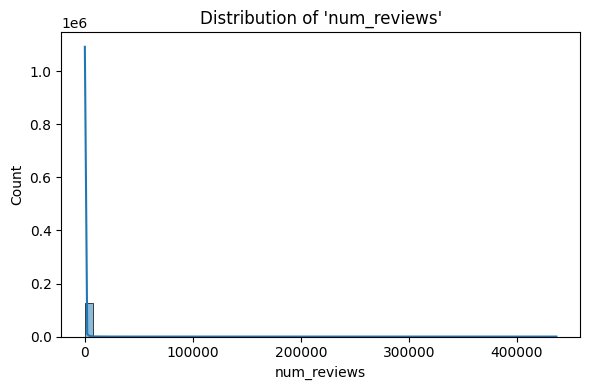

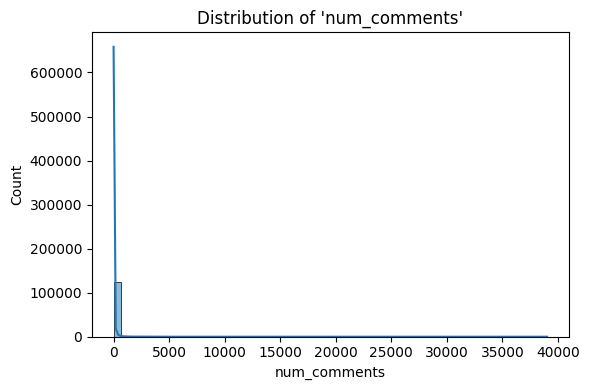

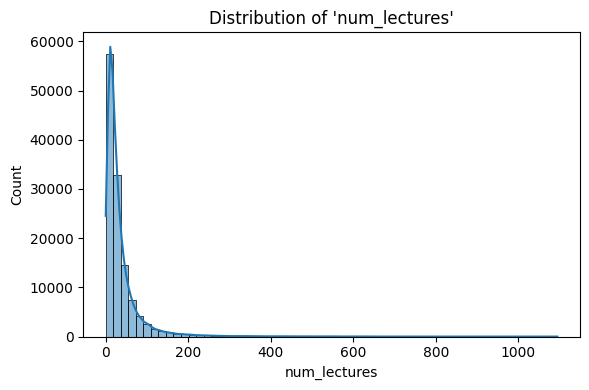

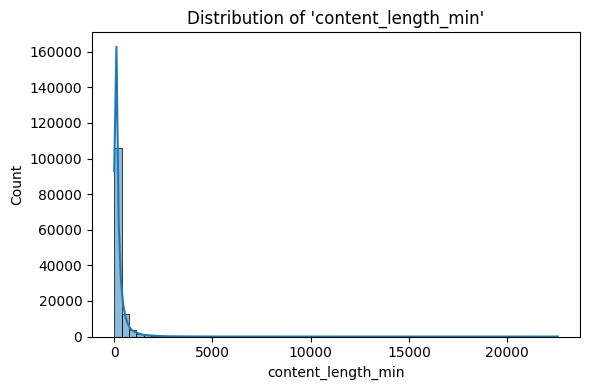

In [ ]:
#check distribution with histogram
def numerical_histogram(data, numeric):
  for i in numeric:
    plt.figure(figsize=(6,4))
    sns.histplot(data[i], kde=True, bins=60)
    plt.title(f'Distribution of \'{i}\'')

    plt.tight_layout()
    plt.show()

numerical_histogram(course_no_duplicate, numerical)

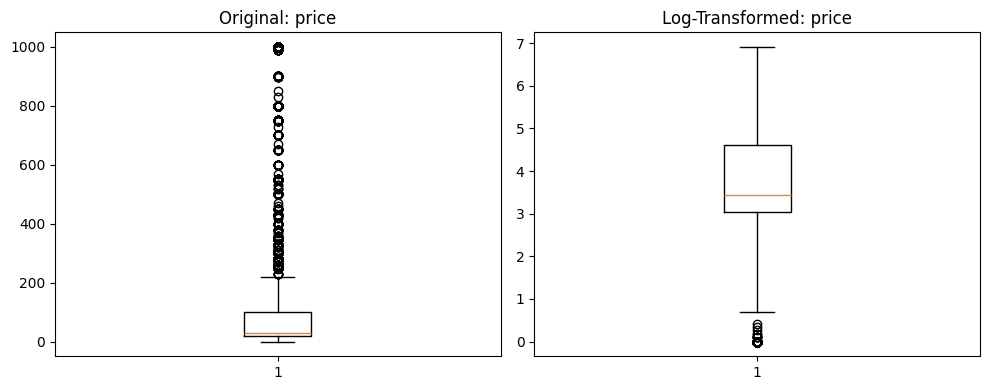

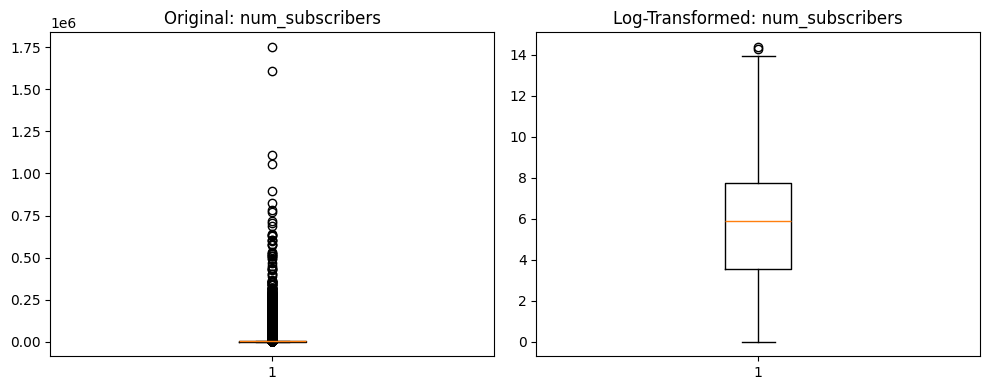

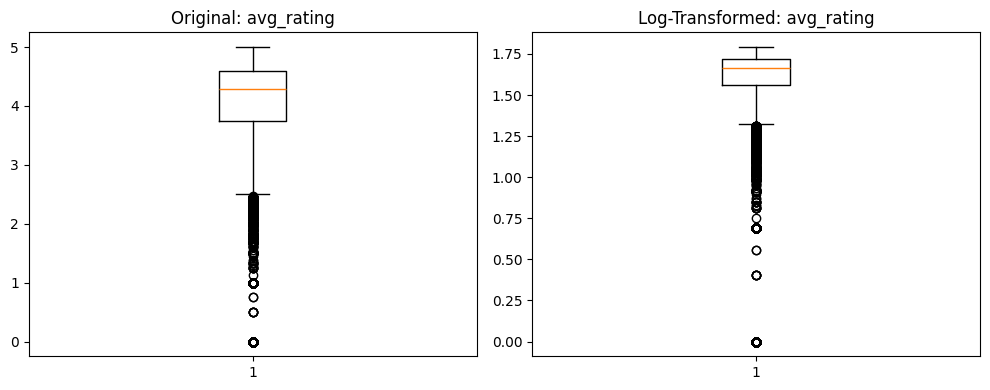

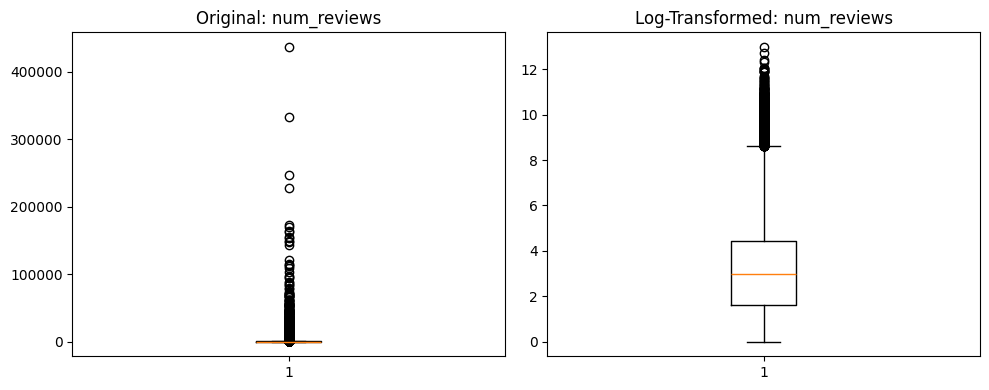

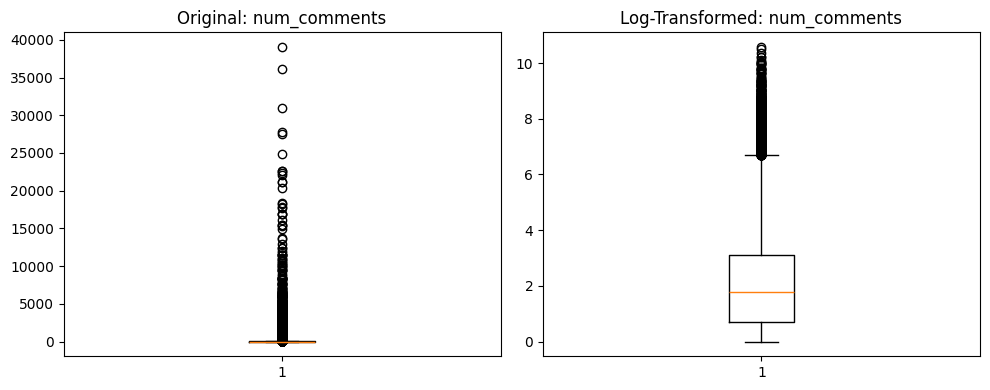

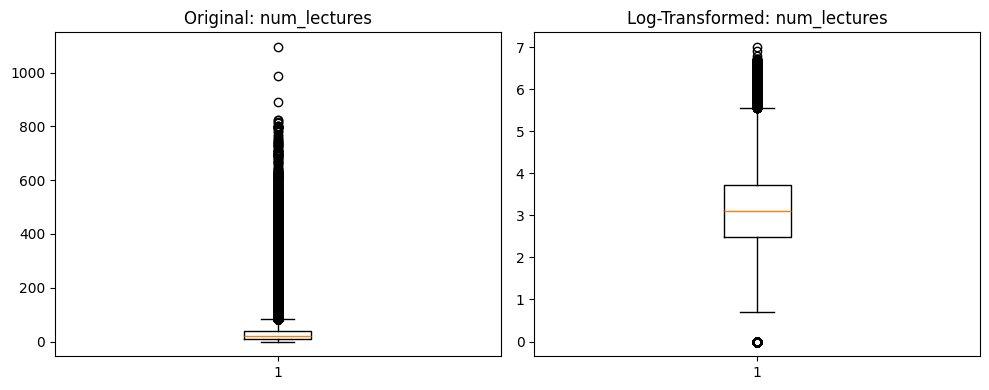

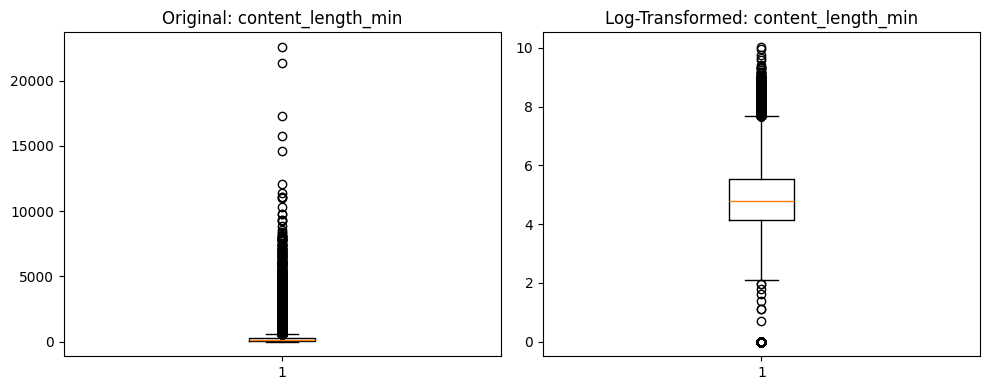

In [ ]:
def numerical_distribution(data, numeric):
    # Apply log transformation
    log_data = np.log1p(data[numeric])

    for col in numeric:
        plt.figure(figsize=(10, 4))

        # Original data
        plt.subplot(1, 2, 1)
        plt.boxplot(data[col].dropna())
        plt.title(f'Original: {col}')

        # Log-transformed data
        plt.subplot(1, 2, 2)
        plt.boxplot(log_data[col].dropna())
        plt.title(f'Log-Transformed: {col}')

        plt.tight_layout()
        plt.show()

# Example usage
numerical_distribution(course_no_duplicate, numerical)

In [ ]:
def basic_statistics(data, features):
    table = data[features].describe().T
    table['IQR'] = table['75%'] - table['25%']
    table['upper bound'] = table['75%'] + 1.5 * table['IQR']
    table['lower bound'] = table['25%'] - 1.5 * table['IQR']

    table = table.round(2)

    return table


def comparison(data, feature):
  stats = basic_statistics(data, feature)
  print(f"Original Data\n{stats.to_markdown(tablefmt='outline')}\n")

comparison(course_no_duplicate, numerical)

Original Data
+--------------------+---------+---------+----------+-------+-------+--------+---------+------------------+---------+---------------+---------------+
|                    |   count |    mean |      std |   min |   25% |    50% |     75% |              max |     IQR |   upper bound |   lower bound |
+====================+=========+=========+==========+=======+=======+========+=========+==================+=========+===============+===============+
| price              |  125501 |   72.24 |   102.09 |     0 | 19.99 |  29.99 |   99.99 |    999           |   80    |        219.99 |       -100.01 |
| num_subscribers    |  125501 | 4230.43 | 19318.6  |     0 | 34    | 357    | 2254    |      1.75236e+06 | 2220    |       5584    |      -3296    |
| avg_rating         |  125501 |    3.72 |     1.51 |     0 |  3.75 |   4.29 |    4.59 |      5           |    0.84 |          5.84 |          2.49 |
| num_reviews        |  125501 |  308.51 |  3080.75 |     0 |  4    |  19    |   82   

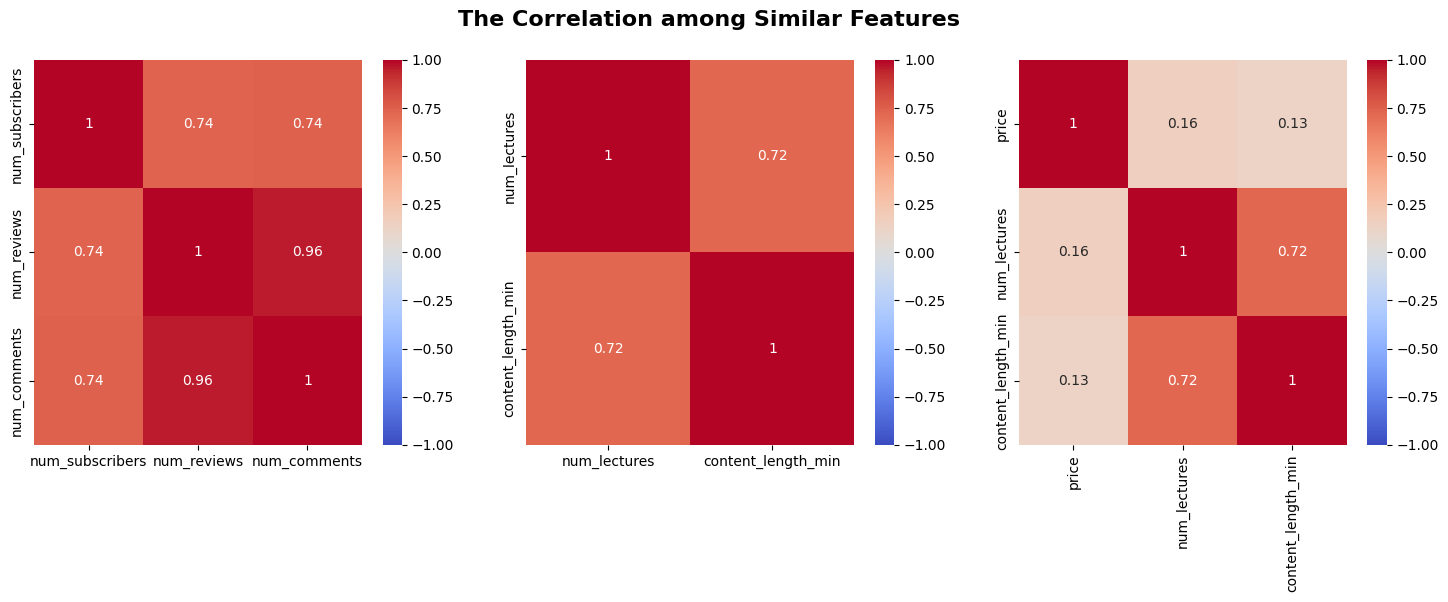

In [ ]:
def heatmap(data):
  feature = {
      'engagement': ['num_subscribers', 'num_reviews', 'num_comments'],
      'duration': ['num_lectures', 'content_length_min'],
      'resource': ['price', 'num_lectures', 'content_length_min']}

  plt.figure(figsize=(18,5))
  plt.suptitle("The Correlation among Similar Features", fontweight='bold', fontsize=16)

  for i, col in enumerate(feature.values(), 1):
    plt.subplot(1,3,i)
    sns.heatmap(data[col].corr(),
                annot=True,
                center=0,
                vmin=-1,
                vmax=1,
                cmap='coolwarm')

  plt.show()

heatmap(course_no_duplicate)

In [ ]:
def correlation(data, features):
    corr_matrix = data[features].corr()
    corr_matrix = corr_matrix.map(lambda x: x if x >= 0.7 else '-')
    return corr_matrix

correlation(course_no_duplicate, numerical)

,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min
price,1.0,-,-,-,-,-,-
num_subscribers,-,1.0,-,0.741788,0.742205,-,-
avg_rating,-,-,1.0,-,-,-,-
num_reviews,-,0.741788,-,1.0,0.957098,-,-
num_comments,-,0.742205,-,0.957098,1.0,-,-
num_lectures,-,-,-,-,-,1.0,0.719745
content_length_min,-,-,-,-,-,0.719745,1.0


In [ ]:
def datetime_convert(data, features, return_result):
  data = data.copy()
  latest_date = '2022-10-10'
  latest_date = pd.to_datetime(latest_date, format='%Y-%m-%d').tz_localize(None)

  for col in features:
      data[col] = pd.to_datetime(data[col]).dt.tz_localize(None)

  data['published_year'] = data['published_time'].dt.year
  data['published_month'] = data['published_time'].dt.month_name()

  group_year = pd.pivot_table(data, index='published_year',
                               values=['id','num_subscribers', 'num_reviews', 'num_comments', 'num_lectures'],
                               aggfunc={'id': len,
                                        'num_subscribers': 'sum',
                                        'num_reviews':'sum',
                                        'num_comments':'sum',
                                        'num_lectures':'sum'})

  data['published_days_ago'] = (latest_date - data['published_time']).dt.days
  data['updated_days_ago'] = (latest_date - data['last_update_date']).dt.days

  return {1: data,
          2: group_year}

datetime_convert(course_no_duplicate, ['published_time', 'last_update_date'], False)

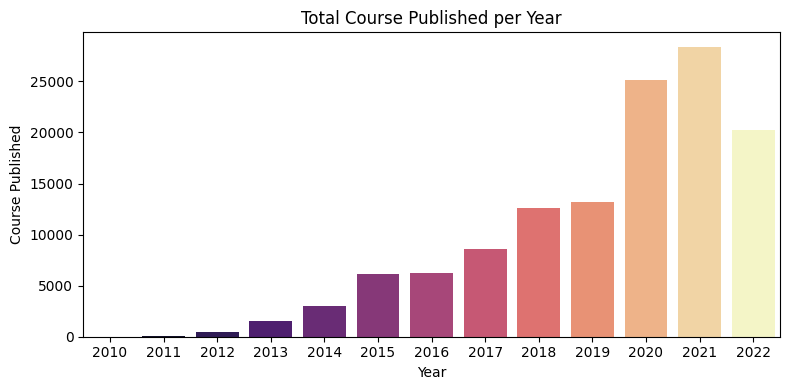

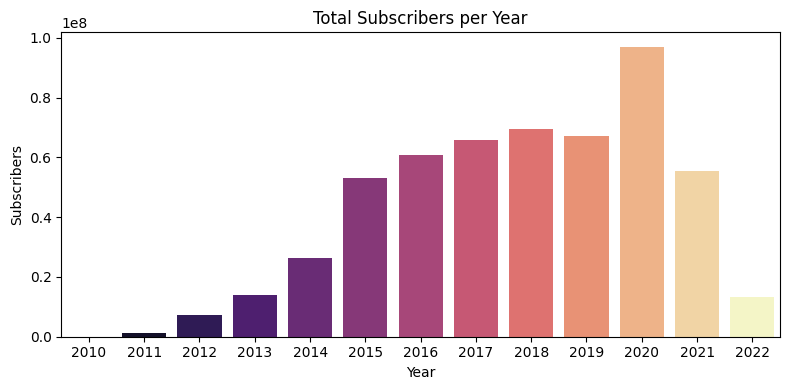

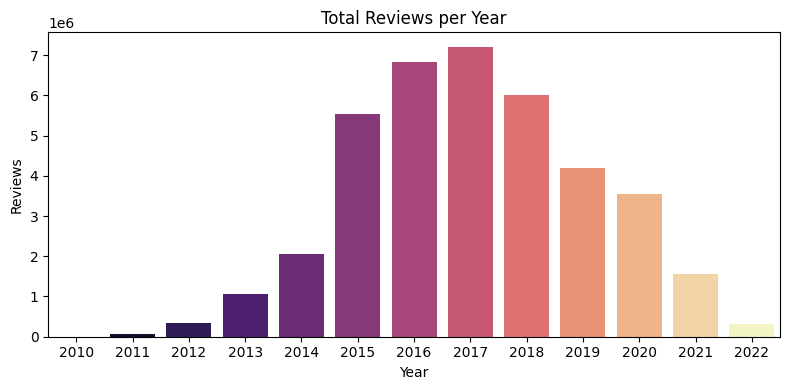

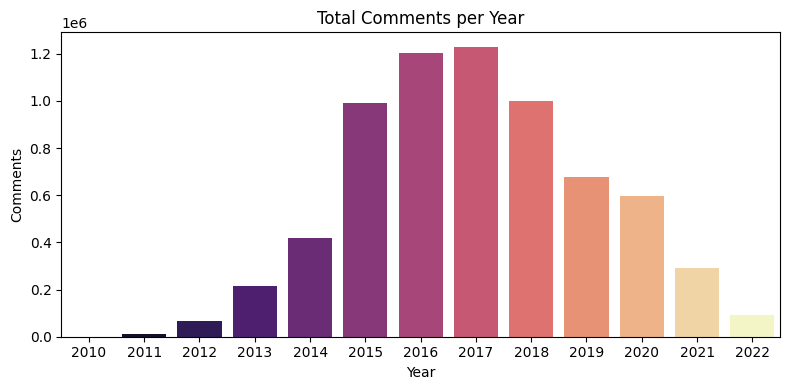

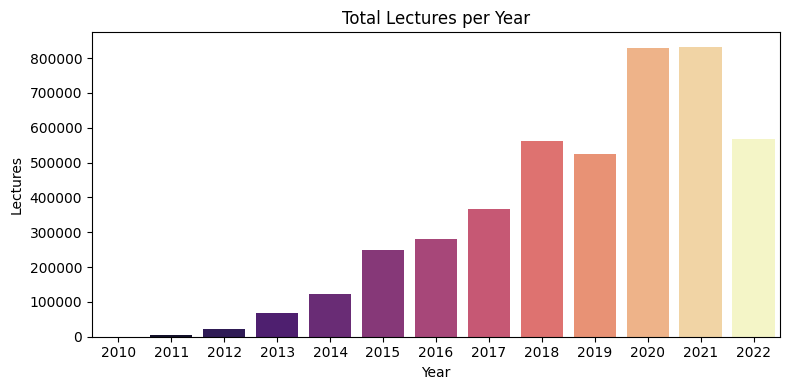

In [ ]:
def annual_check(pivot):
  resource = {'id': 'Course Published',
              'num_subscribers': 'Subscribers',
              'num_reviews': 'Reviews',
              'num_comments':'Comments',
              'num_lectures': 'Lectures'}

  for key, val in resource.items():
    plt.figure(figsize=(8,4))
    sns.barplot(data=pivot,
                hue=pivot.index,
                x=pivot.index,
                y=pivot[key],
                palette='magma',
                legend=False)
    plt.title(f'Total {val} per Year')
    plt.xlabel('Year')
    plt.ylabel(val)

    plt.tight_layout()
    plt.show()

annual_check(datetime_convert(course_no_duplicate, ['published_time', 'last_update_date'], False)[2])

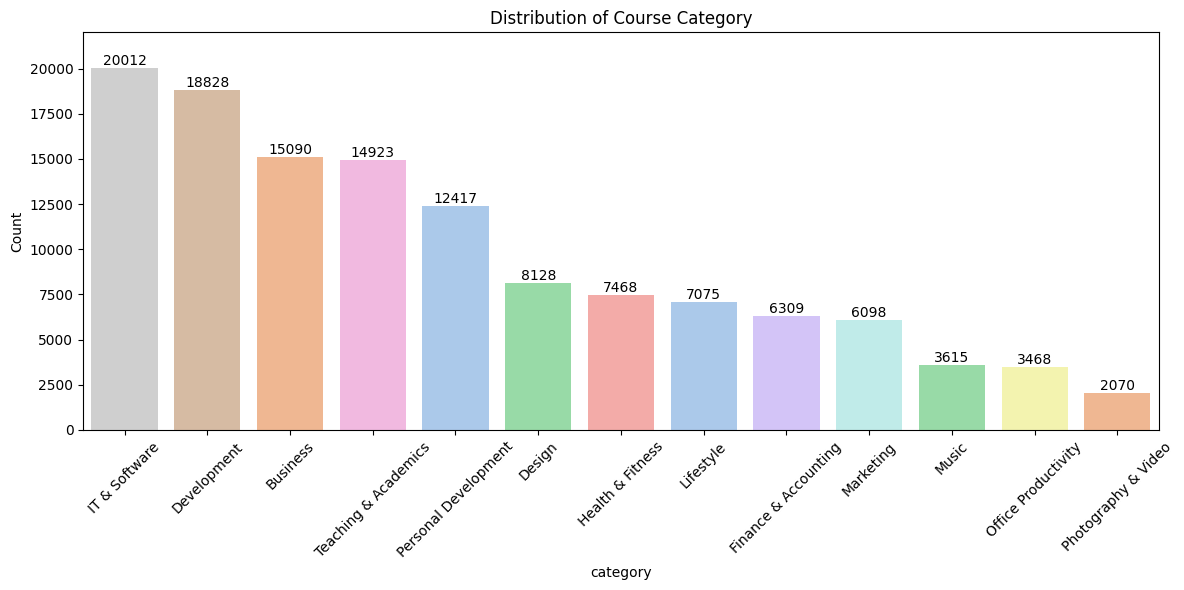

In [ ]:
def category_check(data, feature):
  plt.figure(figsize=(12,6))
  graph = sns.countplot(data=data,
                        x=feature,
                        palette='pastel',
                        order=data[feature].value_counts().index,
                        hue=feature,
                        legend=False)

  for bar in graph.containers:
    plt.bar_label(bar, label_type='edge')

  plt.xlabel(feature)
  plt.xticks(rotation=45)
  plt.ylim(0, max(data[feature].value_counts() + 2000))
  plt.ylabel('Count')
  plt.title('Distribution of Course Category')

  plt.tight_layout()
  plt.show()

category_check(course_no_duplicate, 'category')

In [ ]:
import plotly.express as px

def treemap(data, feature, target):
    fig = px.treemap(
        data,
        path=[feature, target],
        values=[1]*len(data))

    fig.update_traces(
        texttemplate='%{label}<br>%{value} (%{percentParent:.2%})',
        textposition="middle center")

    fig.show()

treemap(course_no_duplicate, 'category', 'subcategory')

Topics with more than 500 use
+-------------------------+---------+
| topic                   |   count |
+=========================+=========+
| Python                  |    1510 |
| Microsoft Certification |    1007 |
| Excel                   |     864 |
| WordPress               |     741 |
| JavaScript              |     694 |
| Java                    |     643 |
| Photoshop               |     639 |
| Meditation              |     619 |
| Math                    |     599 |
| AWS Certification       |     585 |
| English Language        |     541 |
| Yoga                    |     537 |
| Leadership              |     521 |
| Watercolor Painting     |     517 |
| Sales Skills            |     506 |
+-------------------------+---------+


<ipython-input-23-eebb4a1222de>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




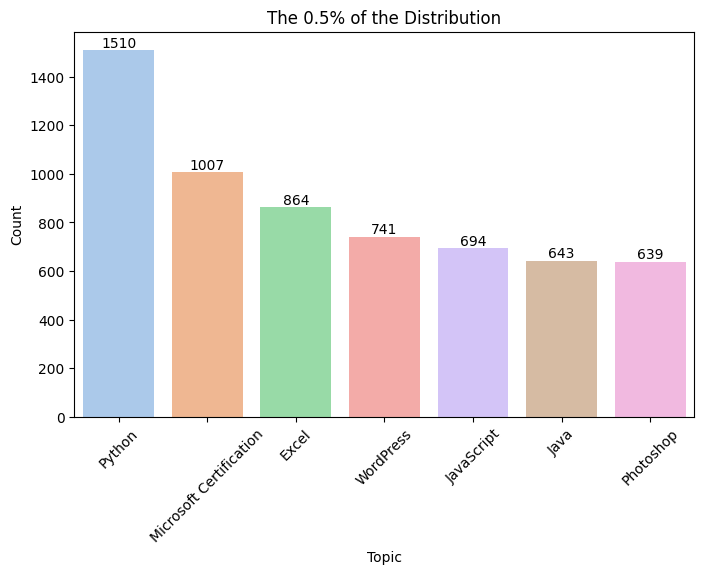

In [ ]:
def topic_check(data, feature):
  topics = data[feature].value_counts()
  topics = topics[topics > 500]
  print("Topics with more than 500 use")
  print(topics.to_markdown(tablefmt='outline'))

  topics_count = data[feature].value_counts(normalize=True)
  significant_topic = topics_count[topics_count > 0.005].index
  grouped_topic = data[feature].apply(lambda n: n if n in significant_topic else 'Other')

  plt.figure(figsize=(8,5))
  graph = sns.countplot(data=data,
                        x=feature,
                        palette='pastel',
                        order=significant_topic)

  for i in graph.containers:
    plt.bar_label(i, label_type='edge')

  plt.title('The 0.5% of the Distribution')
  plt.xlabel('Topic')
  plt.ylabel('Count')

  plt.xticks(rotation=45)

  plt.show()

topic_check(course_no_duplicate, 'topic')

In [ ]:
def revenue_check(data):
  data = data.copy()
  data.loc[:,'revenue'] = data['price'] * data['num_subscribers']
  data.sort_values(by='revenue', ascending=False, inplace=True)

  leaderboard = data.groupby('instructor_name')['revenue'].sum().sort_values(ascending=False)

  summary = pd.DataFrame({
      'Instructor': leaderboard.index,
      'Revenue': leaderboard.values,
      'Total Course Published': data['instructor_name'].value_counts().sort_values(ascending=False).values,
      'Teaching Duration': data.groupby('instructor_name')['content_length_min'].sum().sort_values(ascending=False).values
  })


  return summary

revenue_check(course_no_duplicate)

,Instructor,Revenue,Total Course Published,Teaching Duration
0,Srinidhi Ranganathan,1.734934e+09,1254,387607.0
1,Learn Tech Plus,1.194135e+09,422,366847.0
2,TJ Walker,1.168882e+09,410,193361.0
3,Jose Portilla,8.161082e+08,327,181426.0
4,YouAccel Training,8.012222e+08,323,158359.0
...,...,...,...,...
42543,Ostap Soroka,0.000000e+00,1,0.0
42544,Chaitanaya Sethi,0.000000e+00,1,0.0
42545,Chaitali Patil,0.000000e+00,1,0.0
42546,Daria Vedunova,0.000000e+00,1,0.0
